In [1]:
import importlib
import helper, consts
importlib.reload(consts)
importlib.reload(helper)

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

import json

In [2]:
TEST_DATE = "20211201"
FILE_PATH = "../Data/"

features_filename = consts.FEATURE_PATH + "Hoang_lasso_genetic_algo_features.txt"
with open(features_filename, 'r') as file: FEATURES = [line.strip("\n") for line in file]
class_data = helper.Data(train_data_path=FILE_PATH)

As feature selection being heavily commented, this notebook here implement classical non-linear models we think it will work well and without excessive un-intepretability like a Neural Network.

### Tree Regression

In [3]:
filename = "Hoang_hyperparams"
with open(filename, 'r') as file: hyperparam_dict = json.load(file)

In [4]:
boost_data = helper.Data(train_data_path=FILE_PATH)
boost_data.update_and_get_train_df(TEST_DATE, backward_dayCount = 30)
boost_data.update_and_get_test_df(data_path=FILE_PATH, start_date=TEST_DATE)

Getting files from 2021-10-31 00:00:00 to 2021-11-01 00:00:00, inclusive.
Getting files from 2021-12-01 00:00:00 to 2021-12-01 00:00:00, inclusive.


[            wt     today   tonight     tmwam  dn3sttmwmd       dn1     dn4x1  \
 0     0.001305  0.005654 -0.001720  0.016283    0.036234  0.020291  0.030868   
 1     0.001305 -0.002224 -0.020958  0.002371    0.026136 -0.016287  0.025742   
 2     0.000262 -0.007817  0.003095  0.021922   -0.001448  0.016505 -0.012009   
 3     0.000098 -0.016390  0.006918  0.006334   -0.012626 -0.002516 -0.015125   
 4     0.000413  0.005382 -0.002203 -0.009180    0.021019 -0.001716  0.018936   
 ...        ...       ...       ...       ...         ...       ...       ...   
 3633  0.000851 -0.014279 -0.000511 -0.047940    0.116617 -0.056749  0.104877   
 3634  0.000016  0.014272 -0.009047  0.019896   -0.036260  0.019960 -0.048423   
 3635  0.000173 -0.019764  0.010639 -0.031891   -0.064745 -0.043928 -0.045789   
 3636  0.000021  0.007623 -0.019450 -0.004457   -0.022859 -0.020260 -0.028787   
 3637  0.000065 -0.056524  0.039633  0.012093    0.032519 -0.013235  0.057503   
 
       cftorrrelstd_open_0

You're using: XGBOOST.
Remember: Model Class works with 1 training data and N testing data.
Your model's DEFAULT init hyperparams are: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_pa

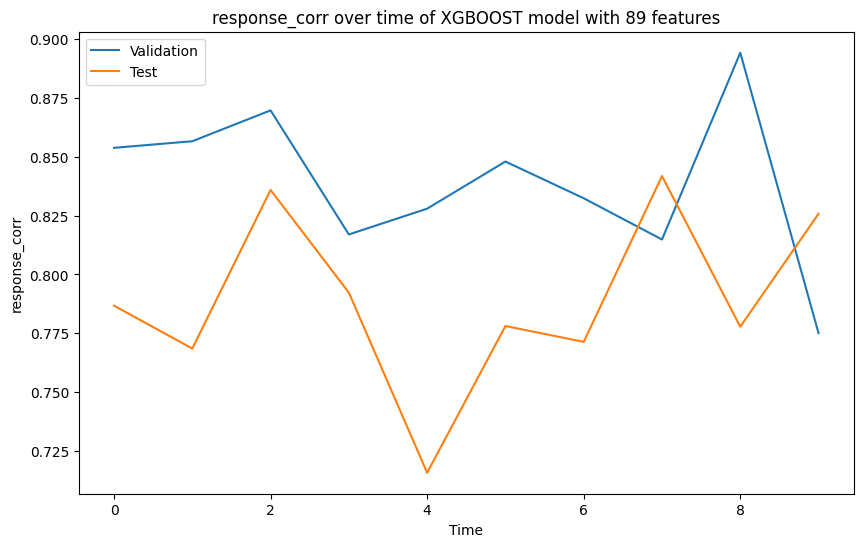

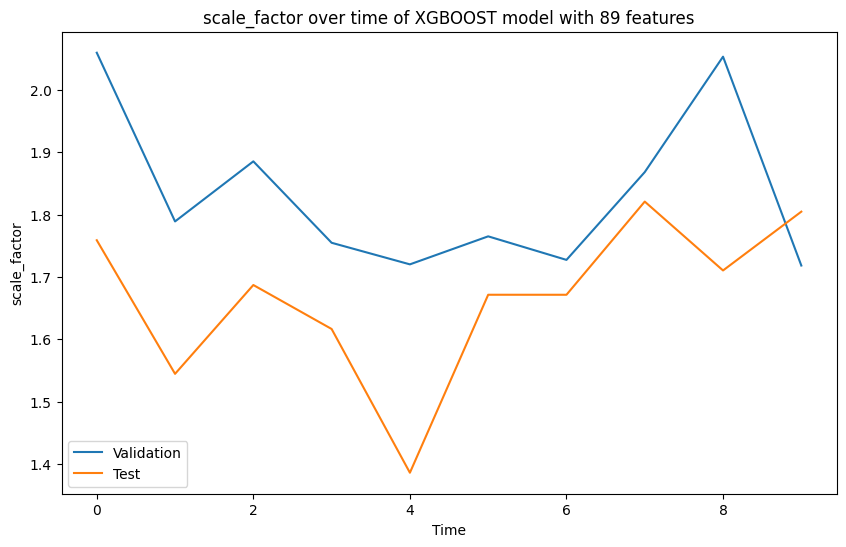

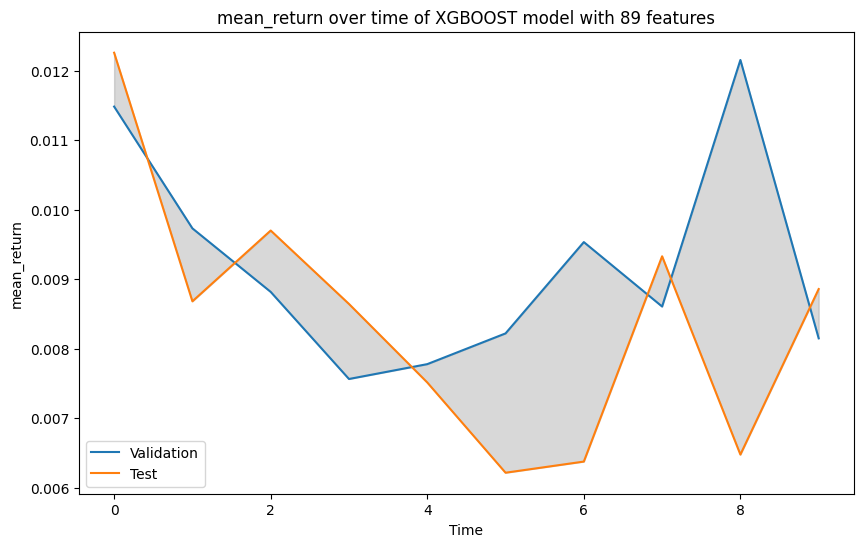

In [5]:
kwarg1 = {"random_state": 0,
          "booster": "gbtree",
          "reg_lambda": hyperparam_dict["ccp_alpha"],
          "max_depth": hyperparam_dict["max_depth"],
          "max_leaves": hyperparam_dict["max_leaf_nodes"],
          "random_state": hyperparam_dict["random_state"],
          "eval_metric": sklearn.metrics.mean_absolute_error,
          "learning_rate": 0.01, # because hyperparam_dict["ccp_alpha"] has 2 decimals
          }

model1 = helper.Model("XGBoost", hyperparam_dict=kwarg1)
model1.train(boost_data.train_df, feature_col_names=FEATURES)
model1.test(boost_data.test_dfs)
helper.validation_plot(boost_data, model1, 10, TEST_DATE, train_data_count= 30, 
                       data_path=FILE_PATH, forward_dayCount = 15, features = FEATURES)

Getting files from 2021-10-31 00:00:00 to 2021-11-30 00:00:00, inclusive.
Getting files from 2021-12-01 00:00:00 to 2021-12-16 00:00:00, inclusive.


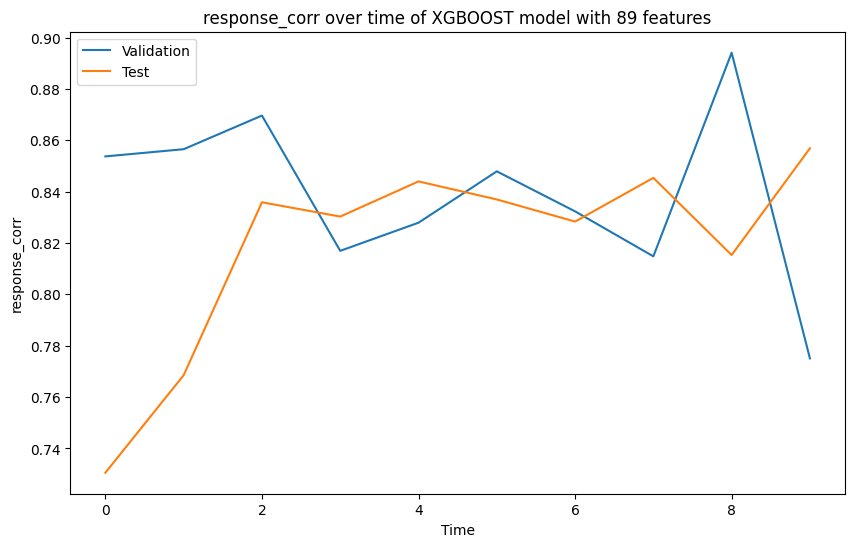

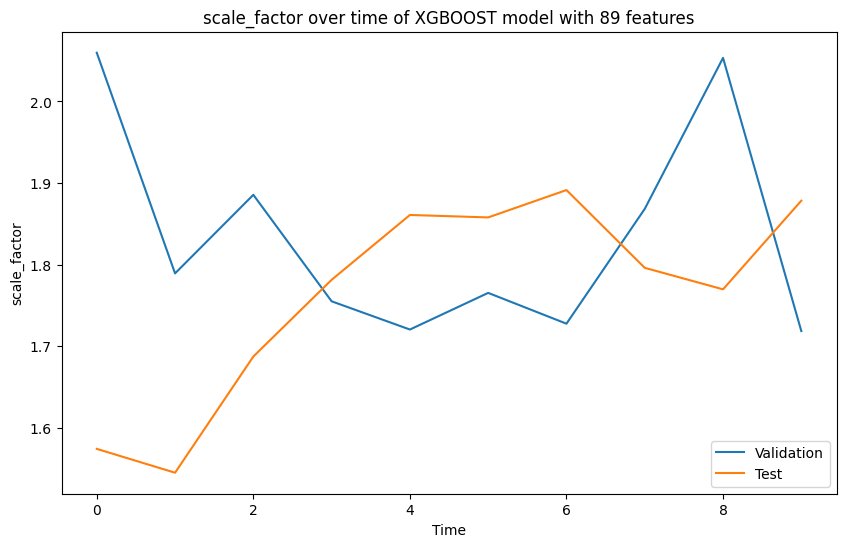

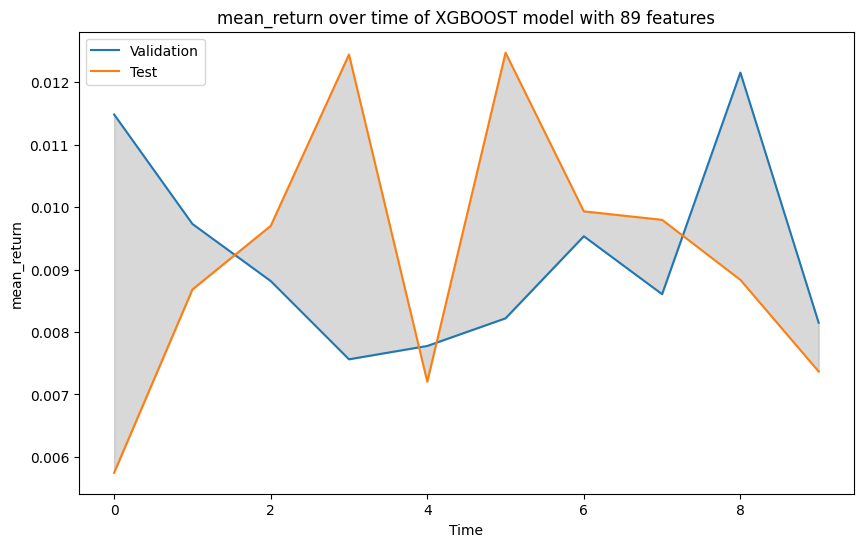

In [6]:
helper.validation_plot(boost_data, model1, 10, TEST_DATE, train_data_count= 30, 
                       data_path=FILE_PATH, forward_dayCount = 15, features = FEATURES)

### Suppor Vector Regressions

In [7]:
svr_data = helper.Data(train_data_path=FILE_PATH)
svr_data.update_and_get_train_df(TEST_DATE, backward_dayCount = 30)
svr_data.update_and_get_test_df(data_path=FILE_PATH, start_date=TEST_DATE)

Getting files from 2021-10-31 00:00:00 to 2021-11-01 00:00:00, inclusive.
Getting files from 2021-12-01 00:00:00 to 2021-12-01 00:00:00, inclusive.


[            wt     today   tonight     tmwam  dn3sttmwmd       dn1     dn4x1  \
 0     0.001305  0.005654 -0.001720  0.016283    0.036234  0.020291  0.030868   
 1     0.001305 -0.002224 -0.020958  0.002371    0.026136 -0.016287  0.025742   
 2     0.000262 -0.007817  0.003095  0.021922   -0.001448  0.016505 -0.012009   
 3     0.000098 -0.016390  0.006918  0.006334   -0.012626 -0.002516 -0.015125   
 4     0.000413  0.005382 -0.002203 -0.009180    0.021019 -0.001716  0.018936   
 ...        ...       ...       ...       ...         ...       ...       ...   
 3633  0.000851 -0.014279 -0.000511 -0.047940    0.116617 -0.056749  0.104877   
 3634  0.000016  0.014272 -0.009047  0.019896   -0.036260  0.019960 -0.048423   
 3635  0.000173 -0.019764  0.010639 -0.031891   -0.064745 -0.043928 -0.045789   
 3636  0.000021  0.007623 -0.019450 -0.004457   -0.022859 -0.020260 -0.028787   
 3637  0.000065 -0.056524  0.039633  0.012093    0.032519 -0.013235  0.057503   
 
       cftorrrelstd_open_0

#### SVR with very small Gamma

You're using: SVR.
Remember: Model Class works with 1 training data and N testing data.
Your model's DEFAULT init hyperparams are: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
No. features being used: 89
response_corr: -0.00996998168761697
scale_factor: -0.5759920231993403
mean_return: -0.0010329296316657504
Getting files from 2021-10-31 00:00:00 to 2021-11-30 00:00:00, inclusive.
Getting files from 2021-12-01 00:00:00 to 2021-12-16 00:00:00, inclusive.


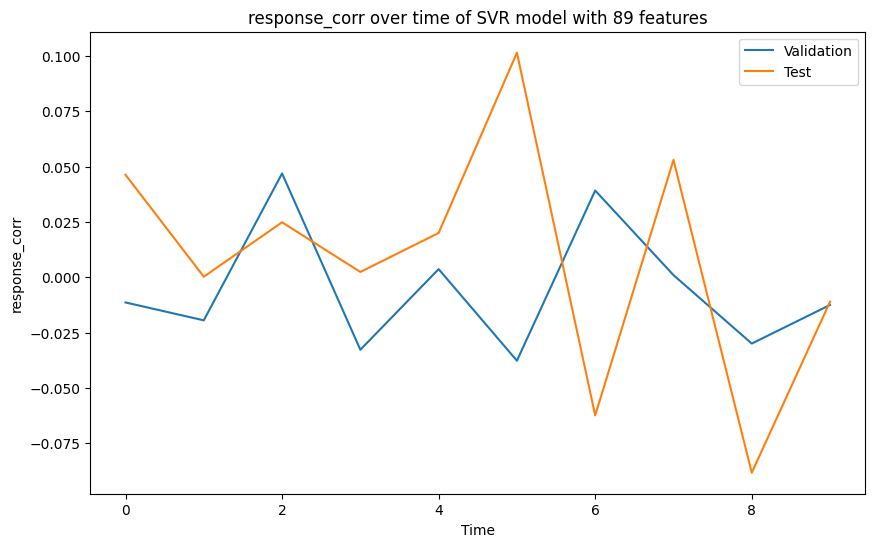

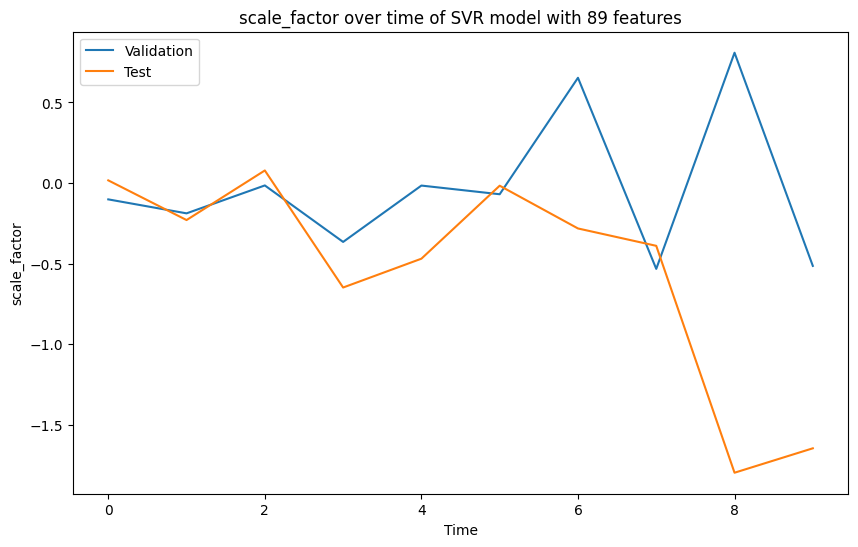

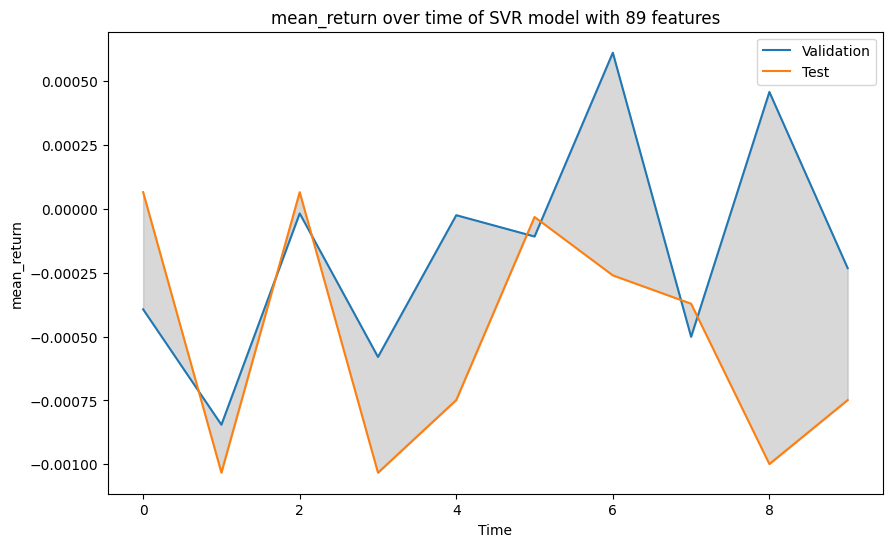

In [8]:
importlib.reload(helper)
model2 = helper.Model("SVR", hyperparam_dict={"kernel": "rbf", "gamma": 0.00000001})
model2.train(svr_data.train_df, feature_col_names=FEATURES)
model2.test(svr_data.test_dfs)
helper.validation_plot(svr_data, model2, 10, TEST_DATE, train_data_count= 30, 
                       data_path=FILE_PATH, forward_dayCount = 15, features = FEATURES)

#### SVR with incrementing gamma

====================== ITERATION 0 ======================
You're using: SVR.
Remember: Model Class works with 1 training data and N testing data.
Your model's DEFAULT init hyperparams are: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
No. features being used: 89
response_corr: 0.0010230097081017186
scale_factor: -0.013789876529268537
mean_return: -0.00011268918474993961
Getting files from 2021-10-31 00:00:00 to 2021-11-30 00:00:00, inclusive.
Getting files from 2021-12-01 00:00:00 to 2021-12-16 00:00:00, inclusive.


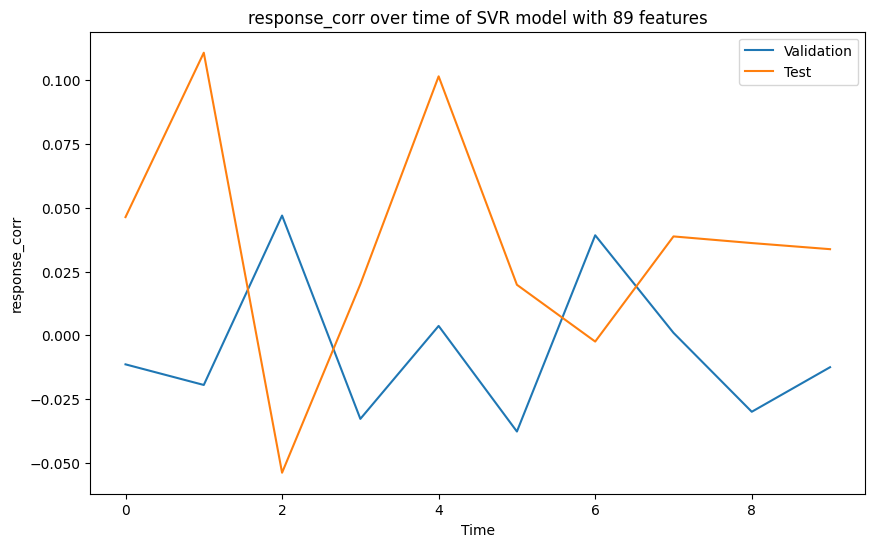

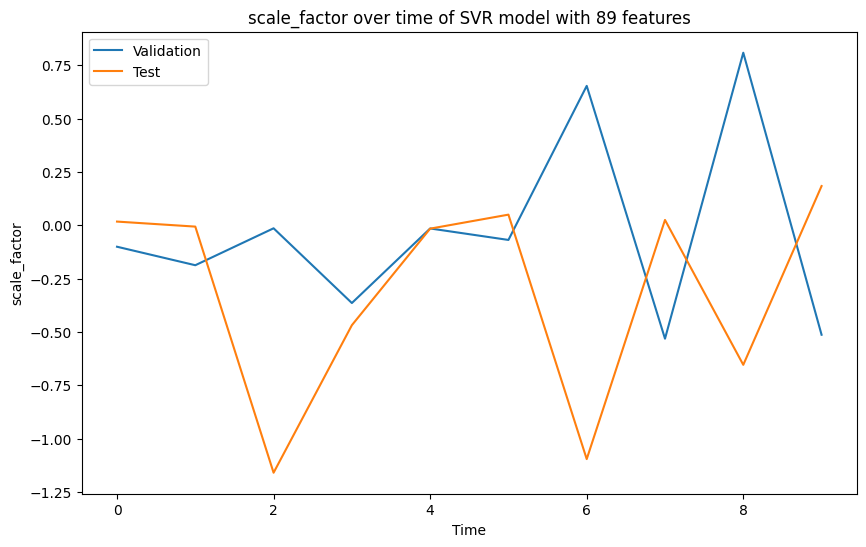

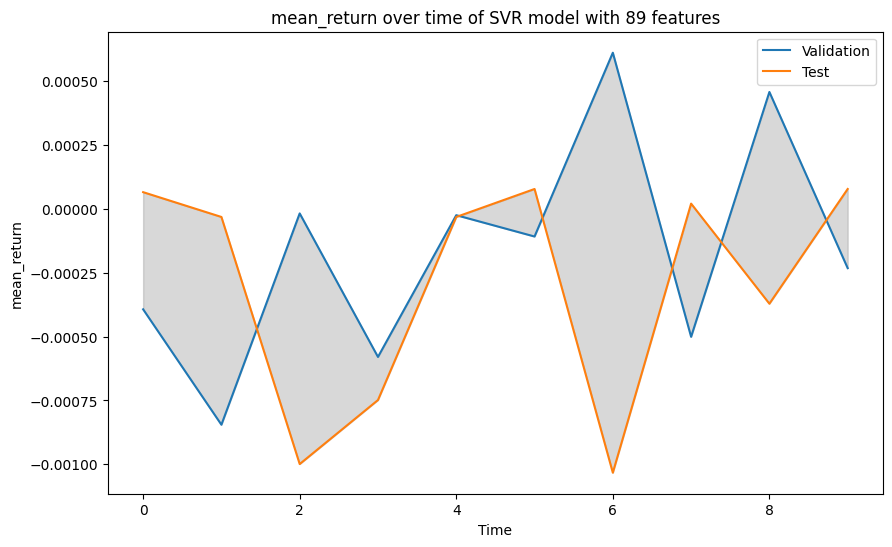

====================== ITERATION 1 ======================
You're using: SVR.
Remember: Model Class works with 1 training data and N testing data.
Your model's DEFAULT init hyperparams are: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
No. features being used: 89
response_corr: 0.0010230140274335442
scale_factor: -0.013789836485271661
mean_return: -0.00011268918474993961
Getting files from 2021-10-31 00:00:00 to 2021-11-30 00:00:00, inclusive.
Getting files from 2021-12-01 00:00:00 to 2021-12-16 00:00:00, inclusive.


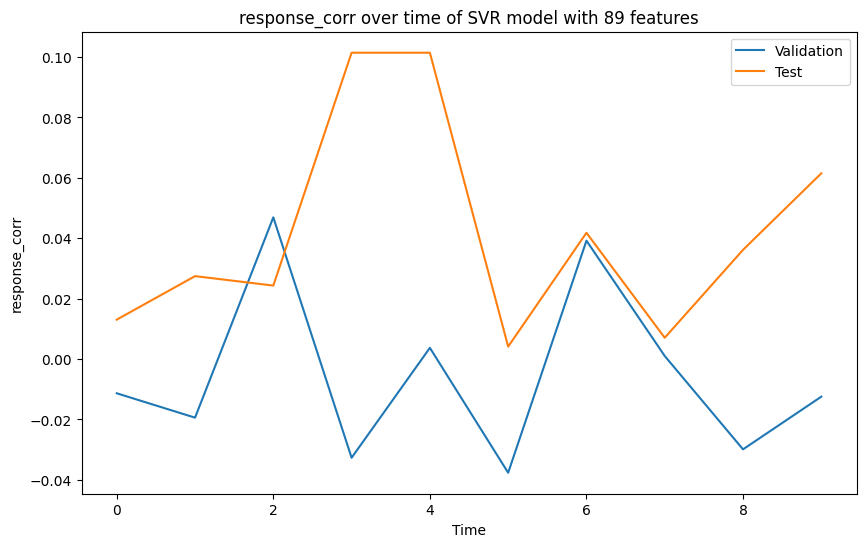

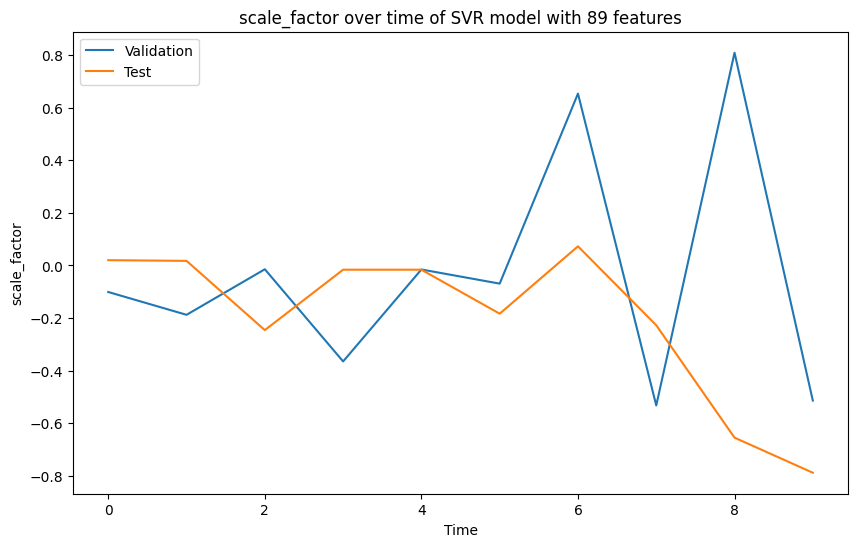

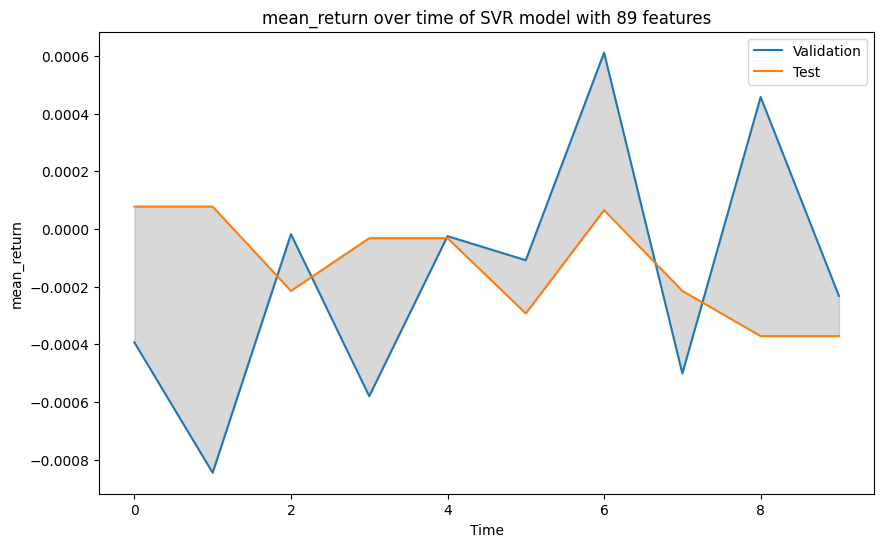

====================== ITERATION 2 ======================
You're using: SVR.
Remember: Model Class works with 1 training data and N testing data.
Your model's DEFAULT init hyperparams are: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
No. features being used: 89
response_corr: 0.0010230189639436947
scale_factor: -0.013789798967402173
mean_return: -0.00011268918474993961
Getting files from 2021-10-31 00:00:00 to 2021-11-30 00:00:00, inclusive.
Getting files from 2021-12-01 00:00:00 to 2021-12-16 00:00:00, inclusive.


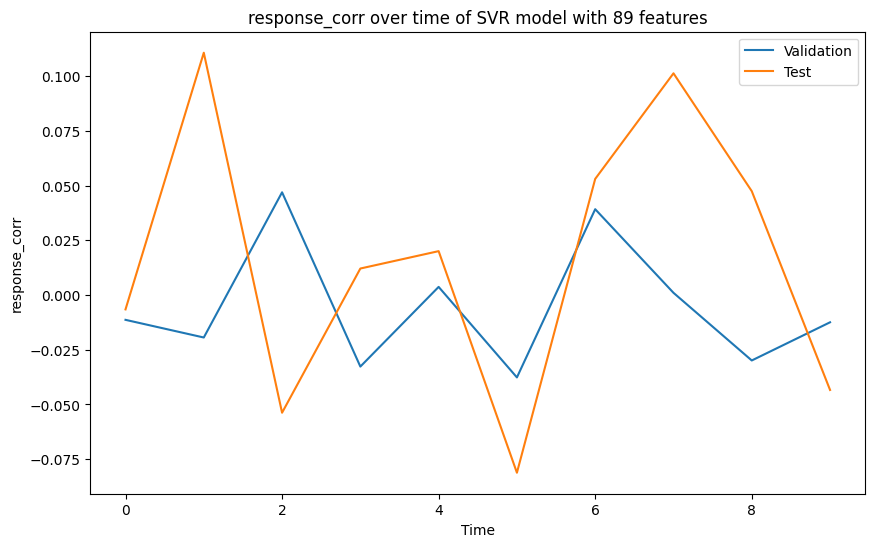

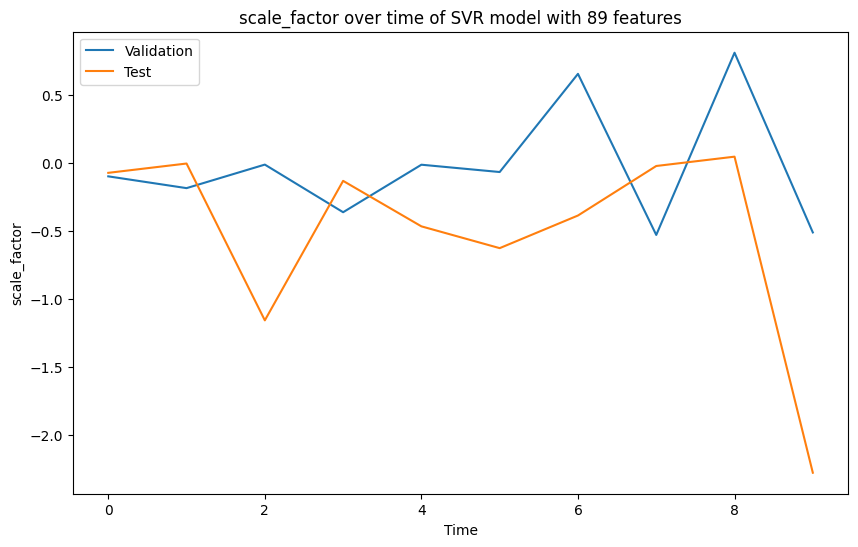

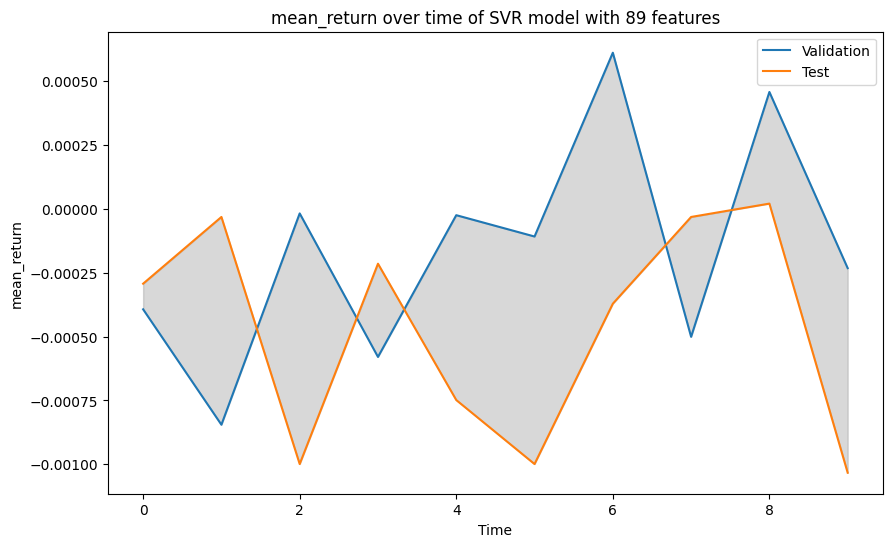

====================== ITERATION 3 ======================
You're using: SVR.
Remember: Model Class works with 1 training data and N testing data.
Your model's DEFAULT init hyperparams are: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
No. features being used: 89
response_corr: 0.0010230253825694797
scale_factor: -0.013789755808360357
mean_return: -0.00011268918474993961
Getting files from 2021-10-31 00:00:00 to 2021-11-30 00:00:00, inclusive.
Getting files from 2021-12-01 00:00:00 to 2021-12-16 00:00:00, inclusive.


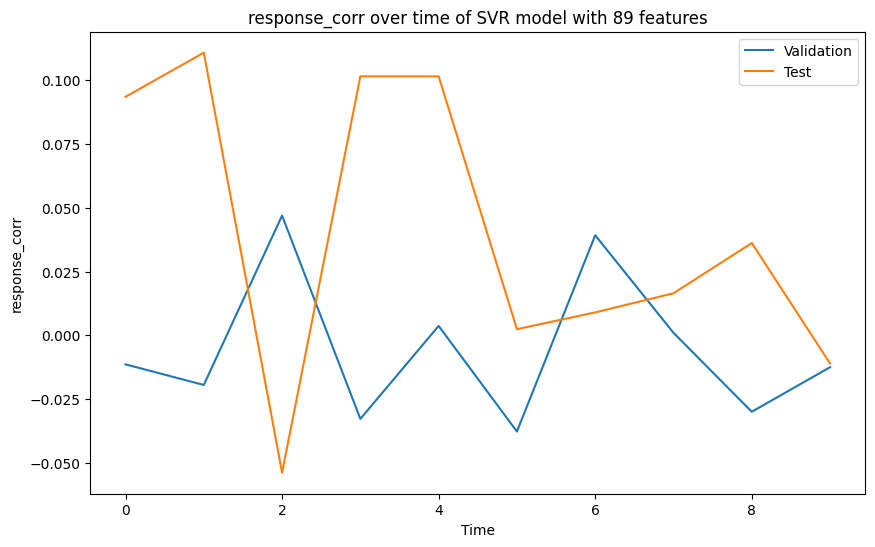

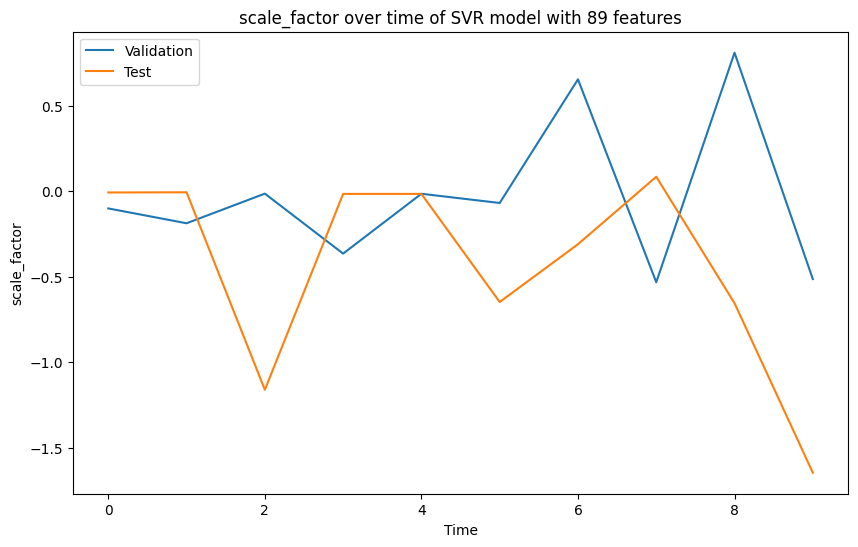

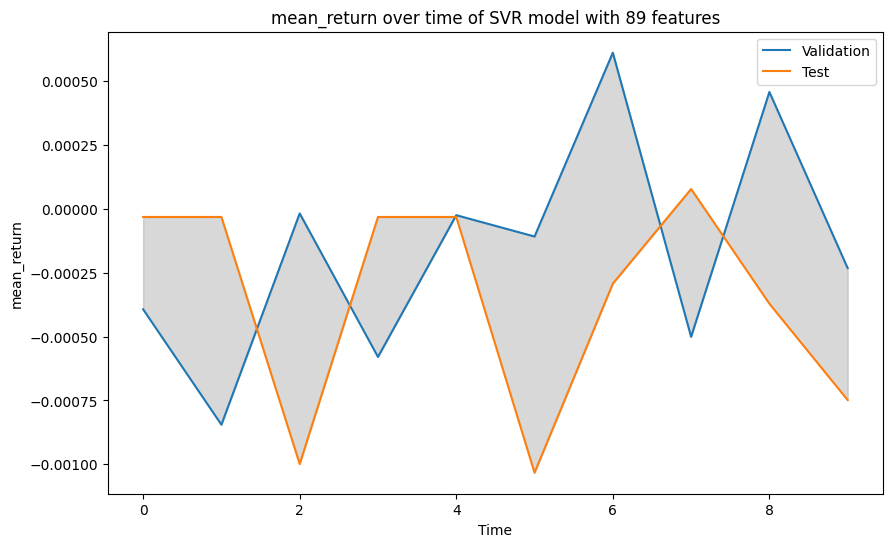

====================== ITERATION 4 ======================
You're using: SVR.
Remember: Model Class works with 1 training data and N testing data.
Your model's DEFAULT init hyperparams are: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
No. features being used: 89
response_corr: 0.0010230311465008798
scale_factor: -0.013789715653076115
mean_return: -0.00011268918474993961
Getting files from 2021-10-31 00:00:00 to 2021-11-30 00:00:00, inclusive.
Getting files from 2021-12-01 00:00:00 to 2021-12-16 00:00:00, inclusive.


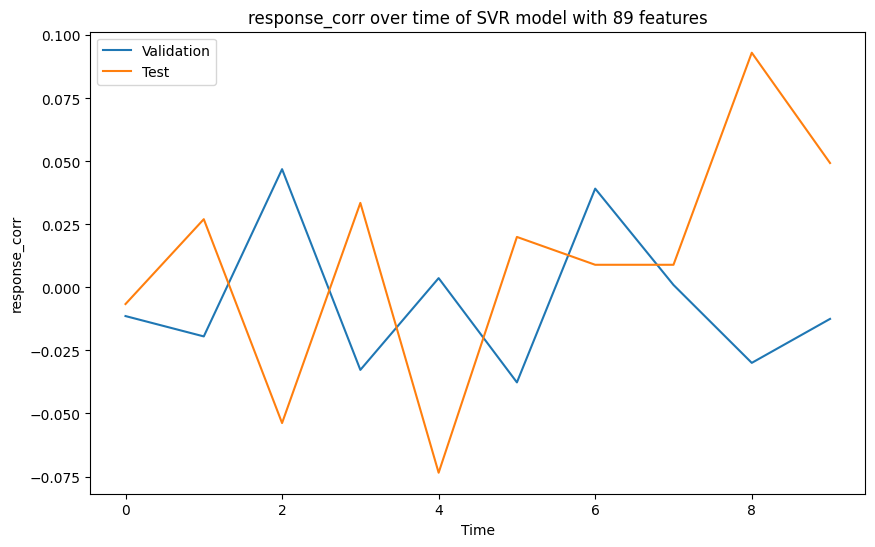

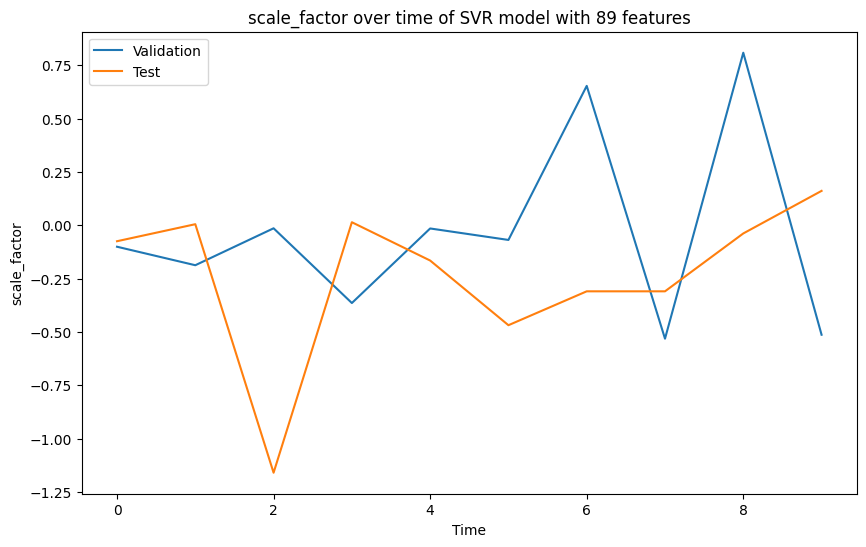

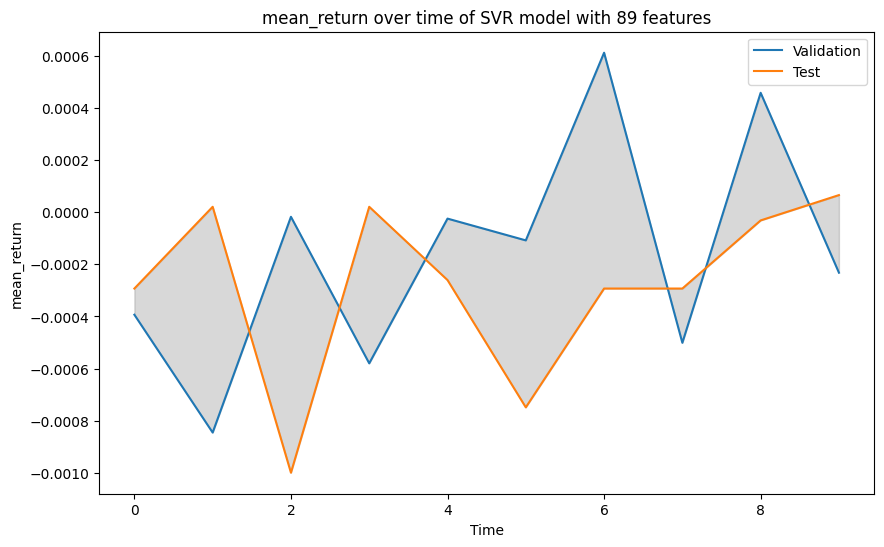

====================== ITERATION 5 ======================
You're using: SVR.
Remember: Model Class works with 1 training data and N testing data.
Your model's DEFAULT init hyperparams are: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
No. features being used: 89
response_corr: 0.0010230339596026573
scale_factor: -0.013789675646611266
mean_return: -0.00011268918474993961
Getting files from 2021-10-31 00:00:00 to 2021-11-30 00:00:00, inclusive.
Getting files from 2021-12-01 00:00:00 to 2021-12-16 00:00:00, inclusive.


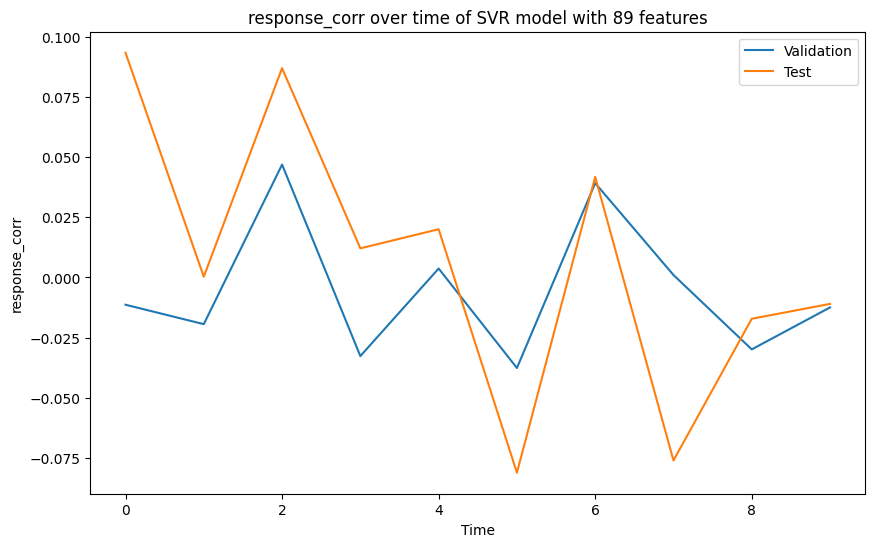

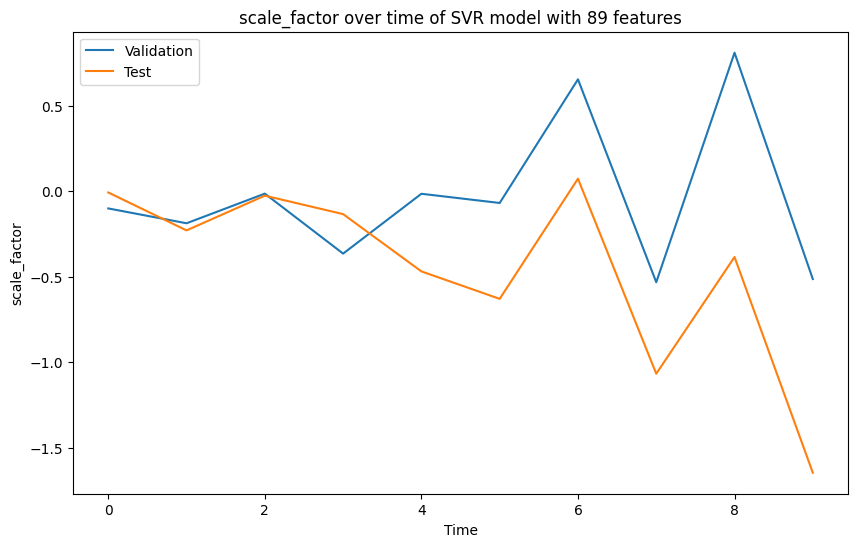

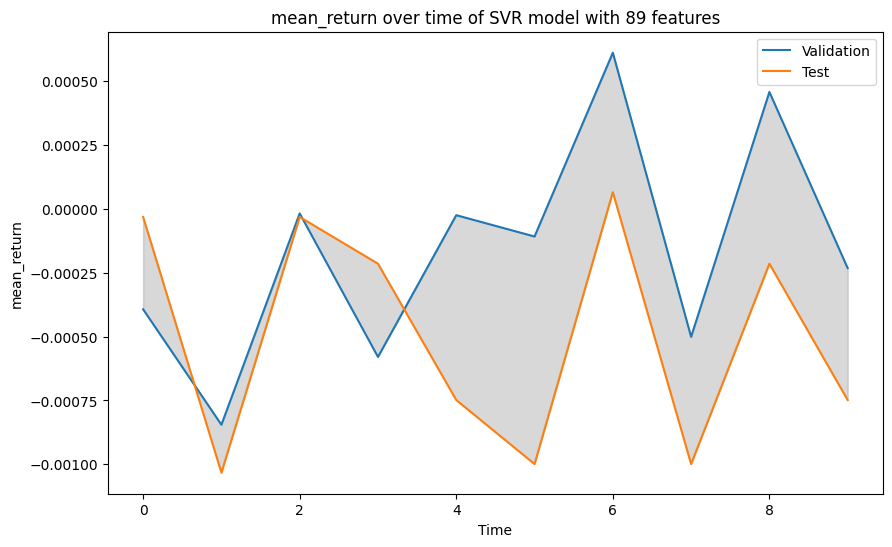

====================== ITERATION 6 ======================
You're using: SVR.
Remember: Model Class works with 1 training data and N testing data.
Your model's DEFAULT init hyperparams are: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
No. features being used: 89
response_corr: 0.001023039154218245
scale_factor: -0.013789632414896244
mean_return: -0.00011268918474993961
Getting files from 2021-10-31 00:00:00 to 2021-11-30 00:00:00, inclusive.
Getting files from 2021-12-01 00:00:00 to 2021-12-16 00:00:00, inclusive.


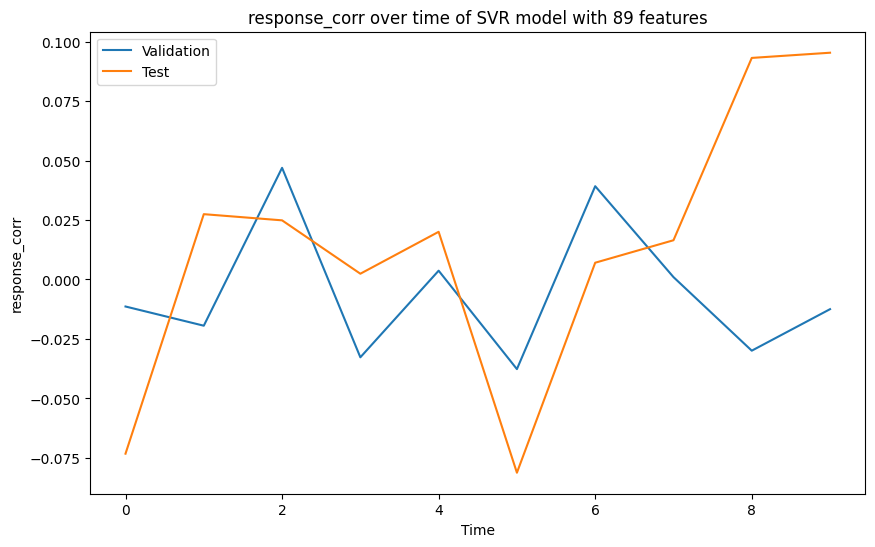

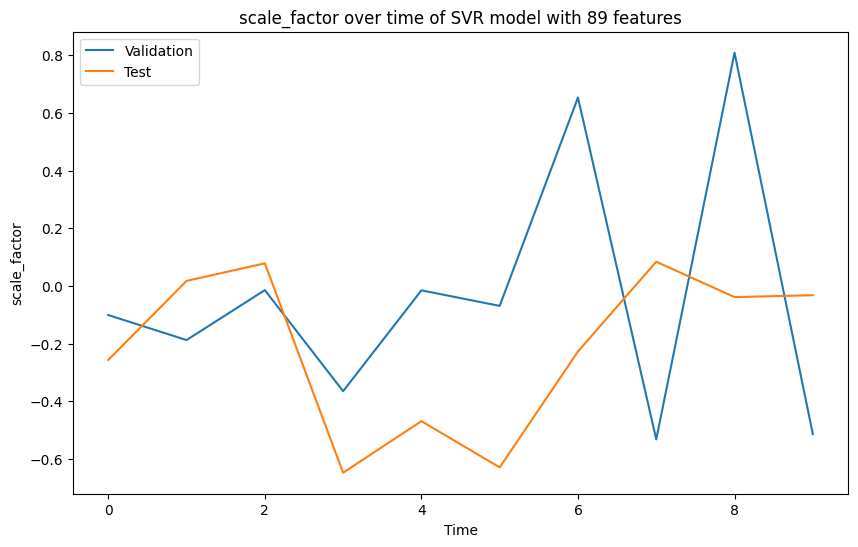

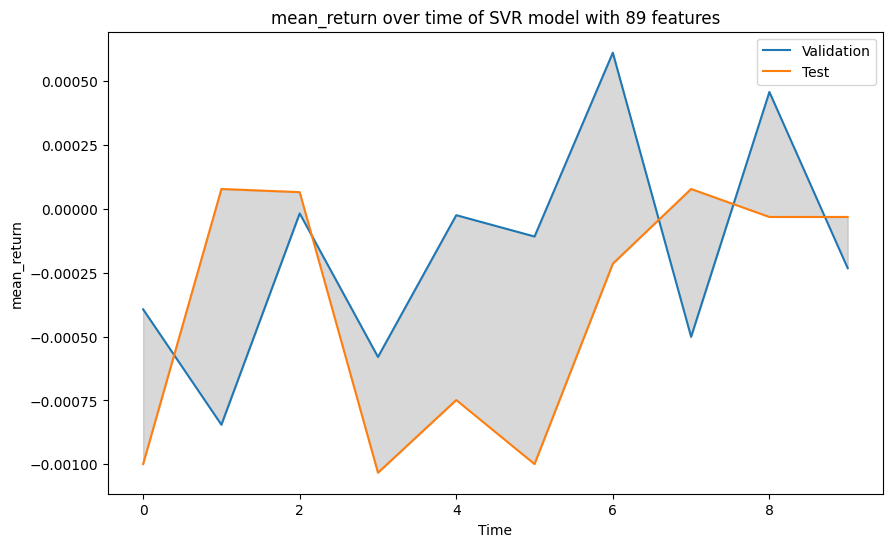

====================== ITERATION 7 ======================
You're using: SVR.
Remember: Model Class works with 1 training data and N testing data.
Your model's DEFAULT init hyperparams are: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
No. features being used: 89
response_corr: 0.0010230417551969438
scale_factor: -0.013789596957444507
mean_return: -0.00011268918474993961
Getting files from 2021-10-31 00:00:00 to 2021-11-30 00:00:00, inclusive.
Getting files from 2021-12-01 00:00:00 to 2021-12-16 00:00:00, inclusive.


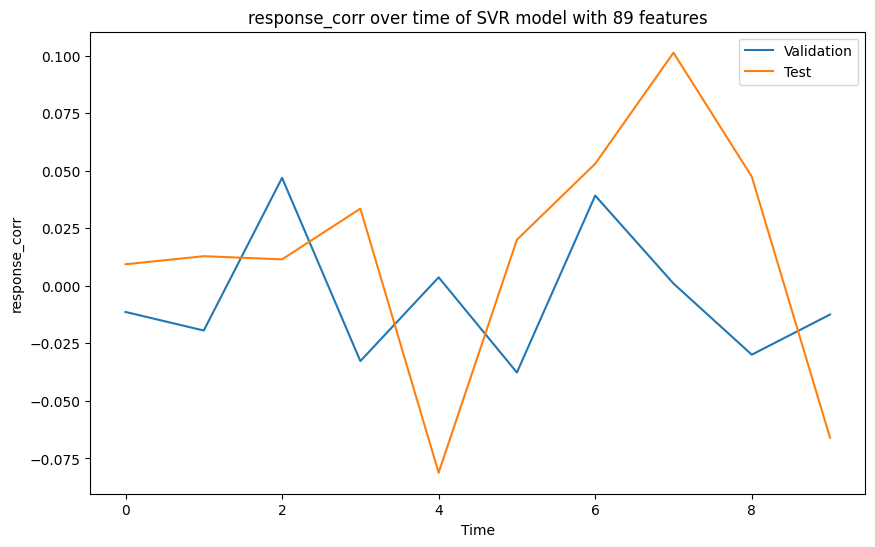

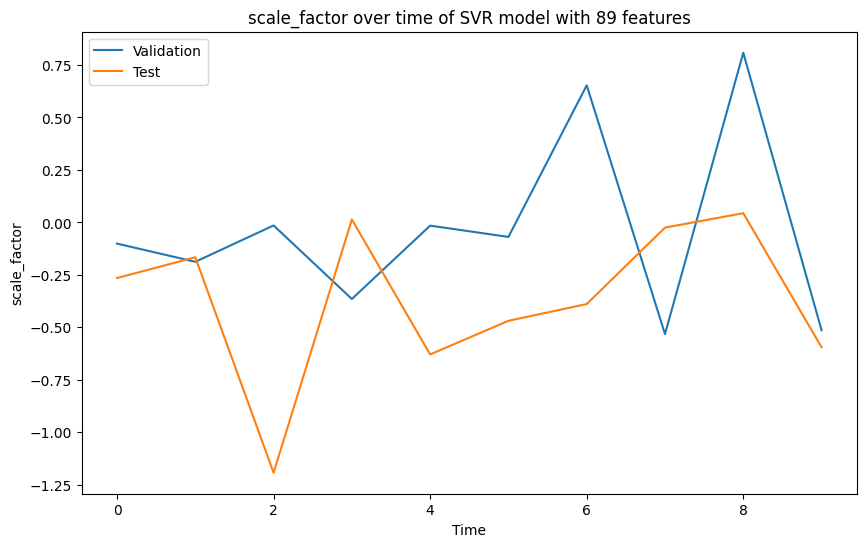

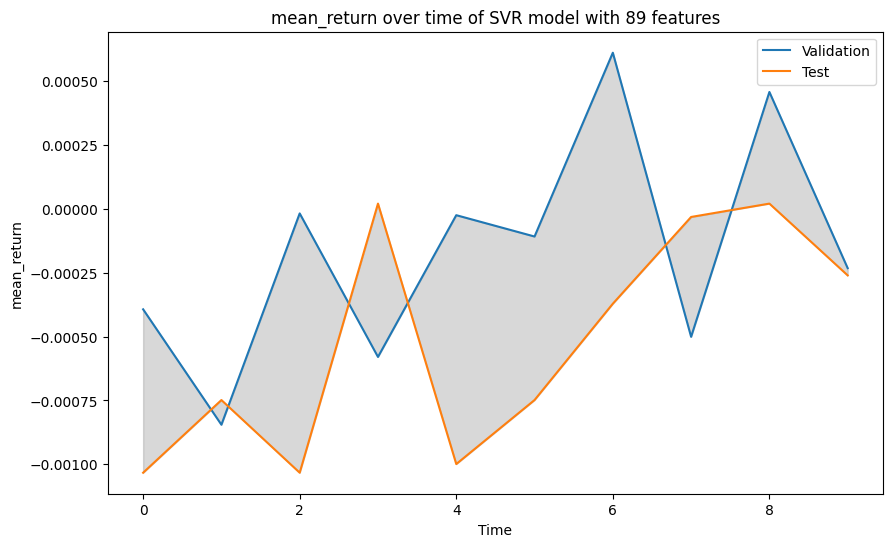

====================== ITERATION 8 ======================
You're using: SVR.
Remember: Model Class works with 1 training data and N testing data.
Your model's DEFAULT init hyperparams are: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
No. features being used: 89
response_corr: 0.0010230514058915477
scale_factor: -0.013789551590292716
mean_return: -0.00011268918474993961
Getting files from 2021-10-31 00:00:00 to 2021-11-30 00:00:00, inclusive.
Getting files from 2021-12-01 00:00:00 to 2021-12-16 00:00:00, inclusive.


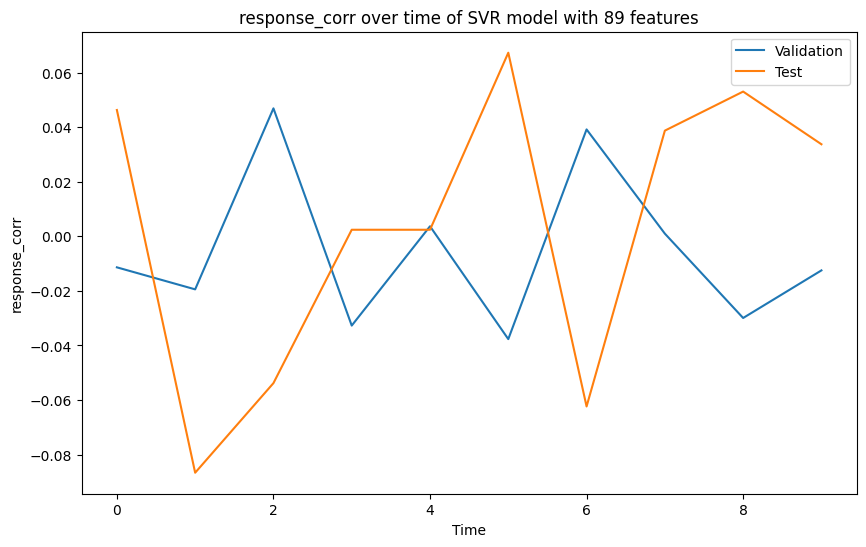

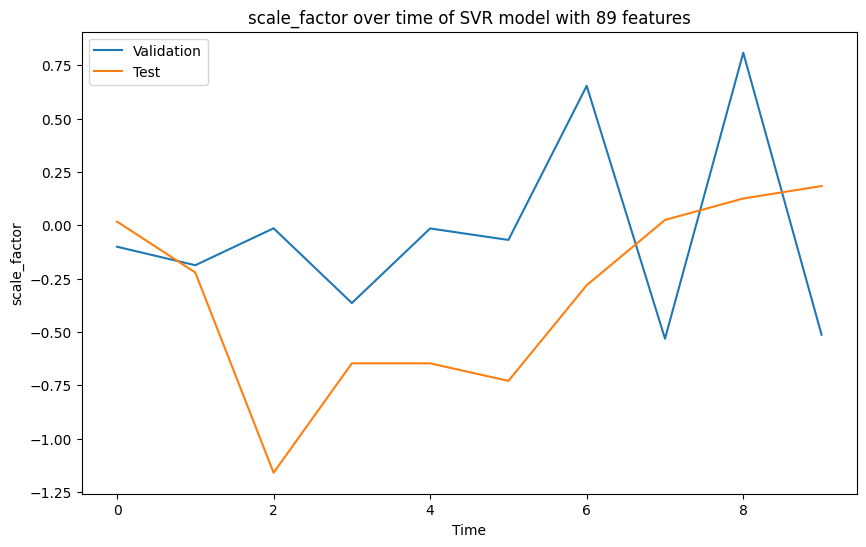

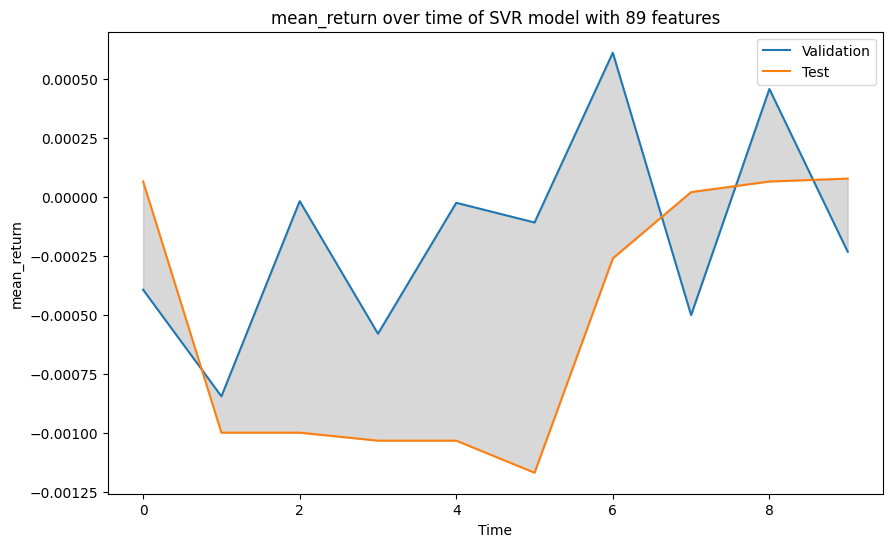

====================== ITERATION 9 ======================
You're using: SVR.
Remember: Model Class works with 1 training data and N testing data.
Your model's DEFAULT init hyperparams are: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
No. features being used: 89
response_corr: 0.0010230555552069932
scale_factor: -0.013789514850966808
mean_return: -0.00011268918474993961
Getting files from 2021-10-31 00:00:00 to 2021-11-30 00:00:00, inclusive.
Getting files from 2021-12-01 00:00:00 to 2021-12-16 00:00:00, inclusive.


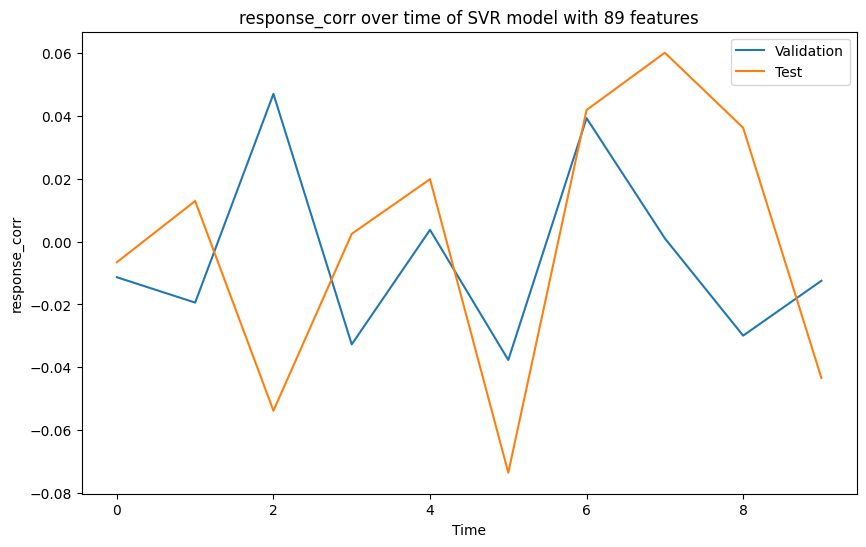

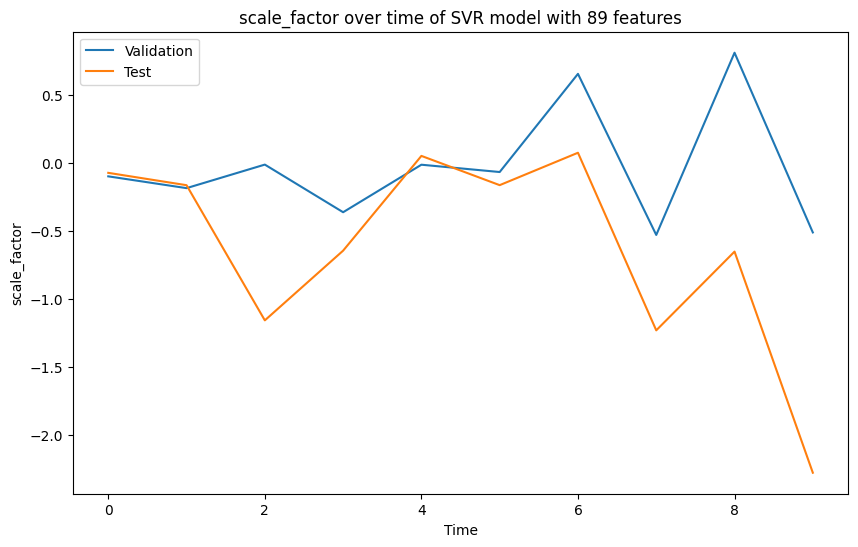

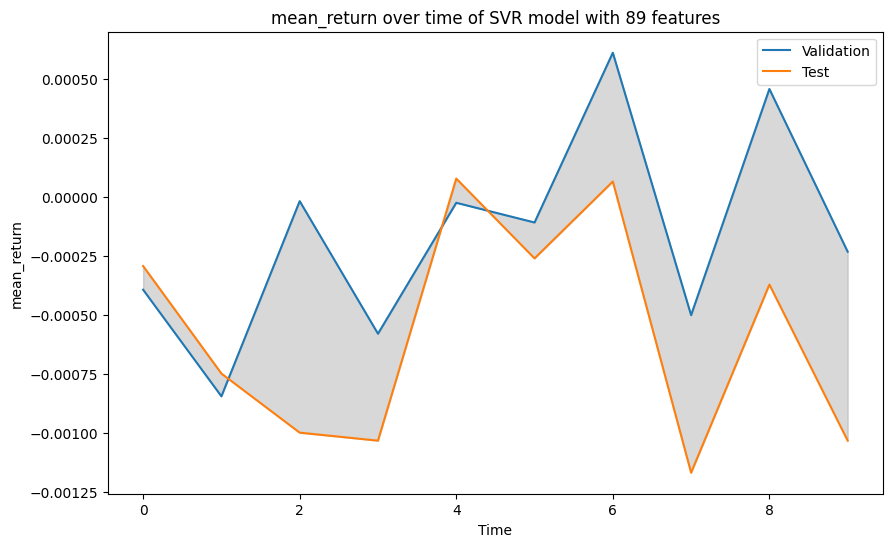

In [9]:
n_features = svr_data.train_df[FEATURES].shape[1]
gamma = 1 / (n_features * np.var(svr_data.train_df[FEATURES].values))

for i in range(10):
    print(f"====================== ITERATION {i} ======================")
    importlib.reload(helper)
    model3 = helper.Model("SVR", hyperparam_dict={"kernel": "rbf", "gamma": gamma - 0.00000001 * i})
    model3.train(svr_data.train_df, feature_col_names=FEATURES)
    model3.test(svr_data.test_dfs)
    helper.validation_plot(svr_data, model2, 10, TEST_DATE, train_data_count= 30, 
                        data_path=FILE_PATH, forward_dayCount = 15, features = FEATURES)